<a href="https://colab.research.google.com/github/Harith18/Loan_Analysis_Project/blob/main/Loan_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task 1: Data Exploration**


In [ ]:
#  Load the dataset into a Python environment
df = pd.read_csv("/content/loan_sanction_test.csv")

In [ ]:
# Display the first few rows of the dataset to understand its structure.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
# Check for missing values and handle them if necessary.

df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df['Gender'] = df['Gender'].fillna('Nan')

In [ ]:
df['Dependents'].value_counts()

,count
Dependents,
0,200
2,59
1,58
3+,40


In [ ]:
df['Dependents'] = df['Dependents'].fillna(0)

In [ ]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,307
Yes,37


In [ ]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df['LoanAmount'].mean()

136.13259668508286

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(136.1)

In [ ]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,311
180.0,22
480.0,8
300.0,7
240.0,4
84.0,3
60.0,1
12.0,1
350.0,1


In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

In [ ]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,279
0.0,59


In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
#  Summarize basic statistics (mean, median,standard deviation, etc.) for the numeric columns

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132153,342.822888,0.839237
std,4910.685399,2334.232099,60.946040,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Task 2: Data Visualization
 2.1 Univariate Analysis

  Explore the distribution of numeric columns using the following visualizations:  

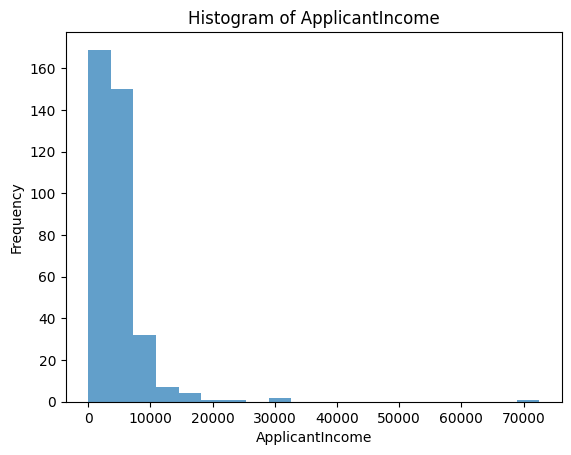

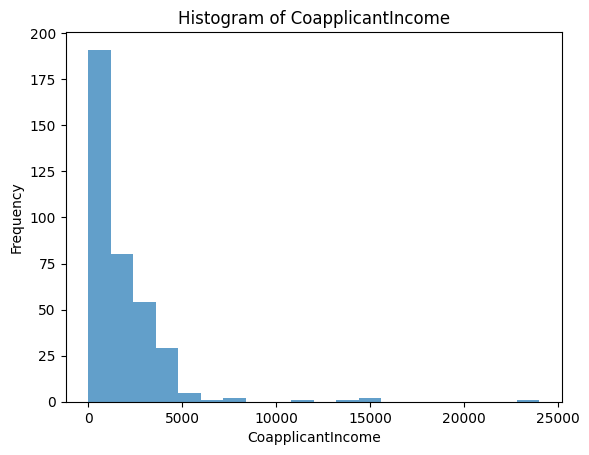

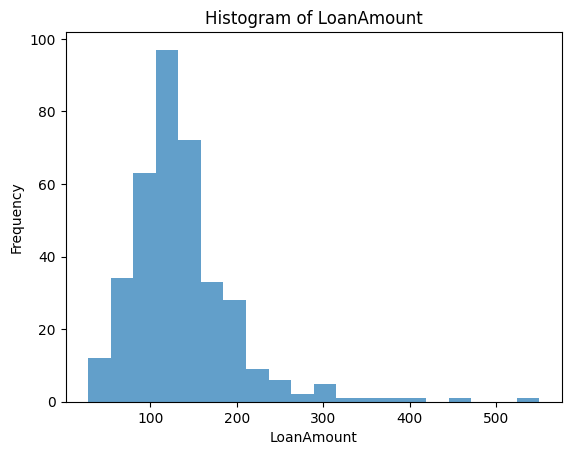

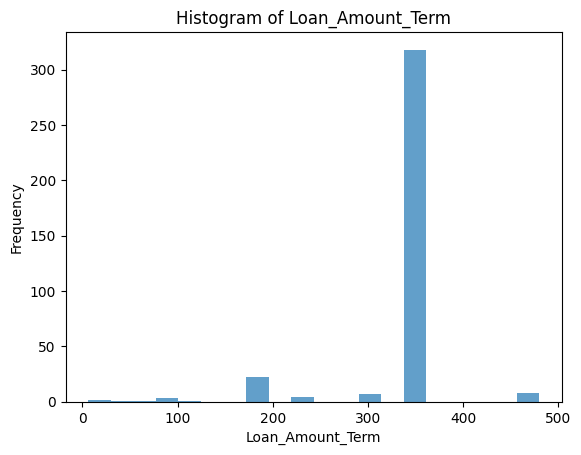

In [ ]:
# Histograms: Plot the frequency distribution of key numeric variables.

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']

for i in numerical_columns:
  plt.hist(df[i], bins = 20, alpha = 0.7)
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {i}")
  plt.show()

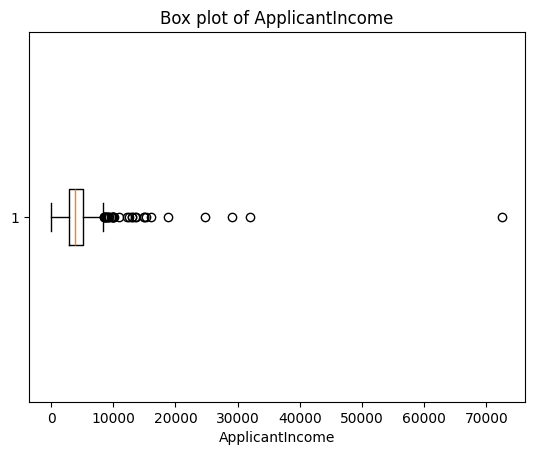

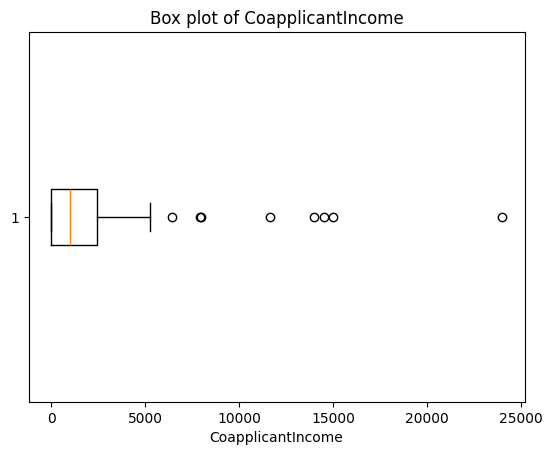

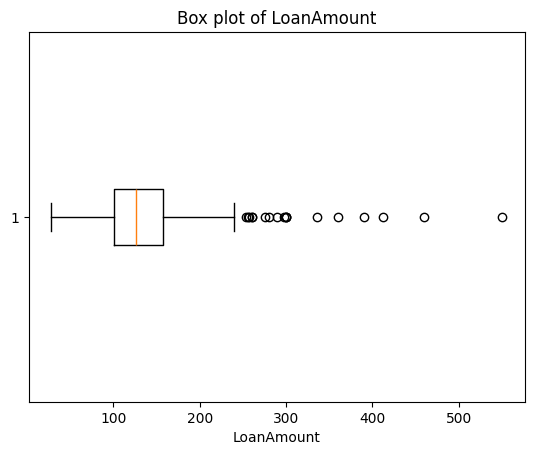

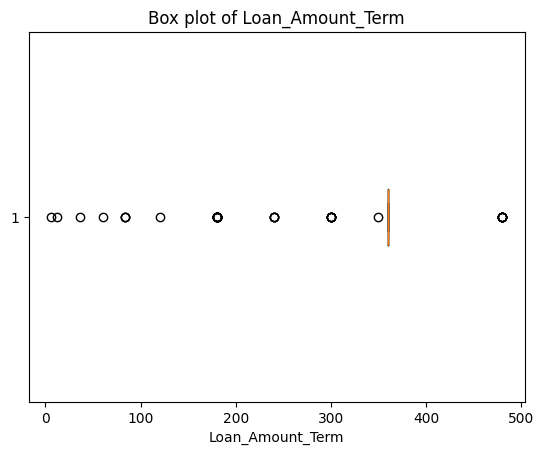

In [ ]:
# Box Plots: Identify potential outliers and visualize the spread of data.

for i in numerical_columns:
  plt.boxplot(df[i], vert = False)
  plt.xlabel(i)
  plt.title(f"Box plot of {i}")
  plt.show()

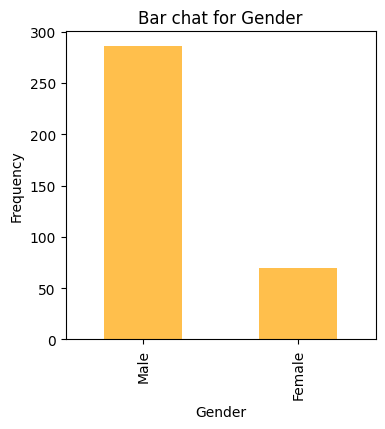

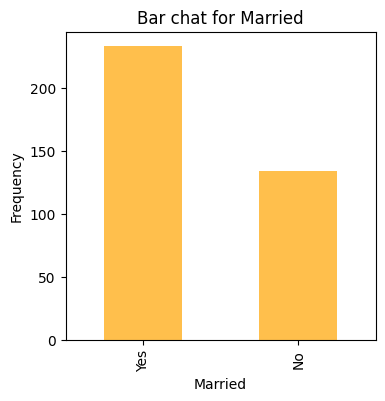

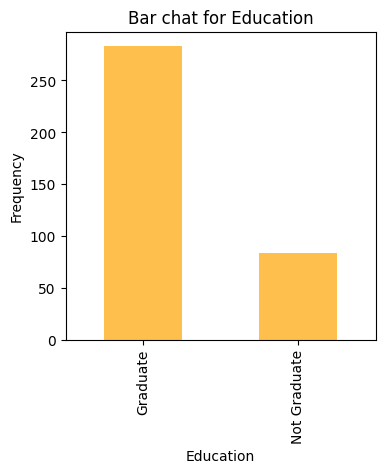

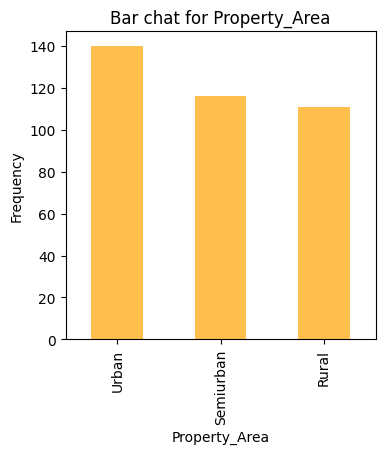

In [ ]:
# Analyze categorical variables by creating the following plots:
  # Bar Charts: Visualize the frequency distribution of categorical variables.

categorical_columns = ["Gender","Married","Education","Property_Area"]

for c in categorical_columns:
  plt.figure(figsize=(4,4))
  df[c].value_counts().plot(kind='bar', color='orange' , alpha=0.7)
  plt.title(f"Bar chat for {c}")
  plt.xlabel(c)
  plt.ylabel('Frequency')
  plt.show()

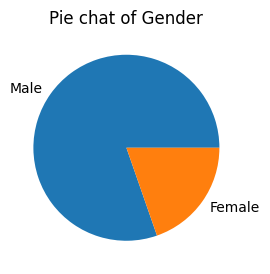

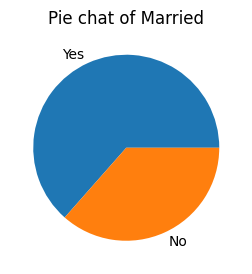

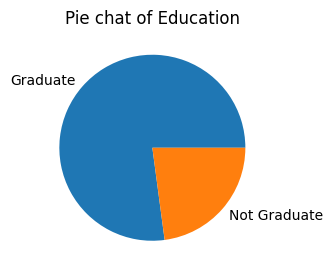

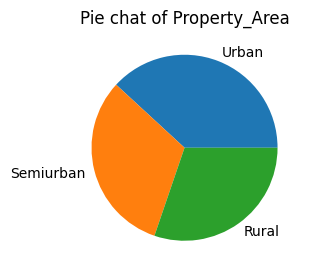

In [ ]:
#  Pie Charts: Represent the composition of categorical variables.

for c in categorical_columns:
  plt.figure(figsize=(3,4))
  df[c].value_counts().plot(kind='pie')
  plt.title(f"Pie chat of {c}")
  plt.ylabel('')
  plt.show()

 2.2 Bivariate Analysis

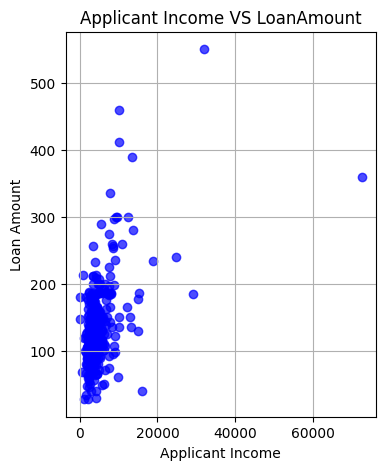

In [ ]:
#  Create scatter plots to explore relationships between pairs of numeric variables.

plt.figure(figsize=(4,5))
plt.scatter(df['ApplicantIncome'],df['LoanAmount'], alpha=0.7, color='blue')
plt.title('Applicant Income VS LoanAmount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

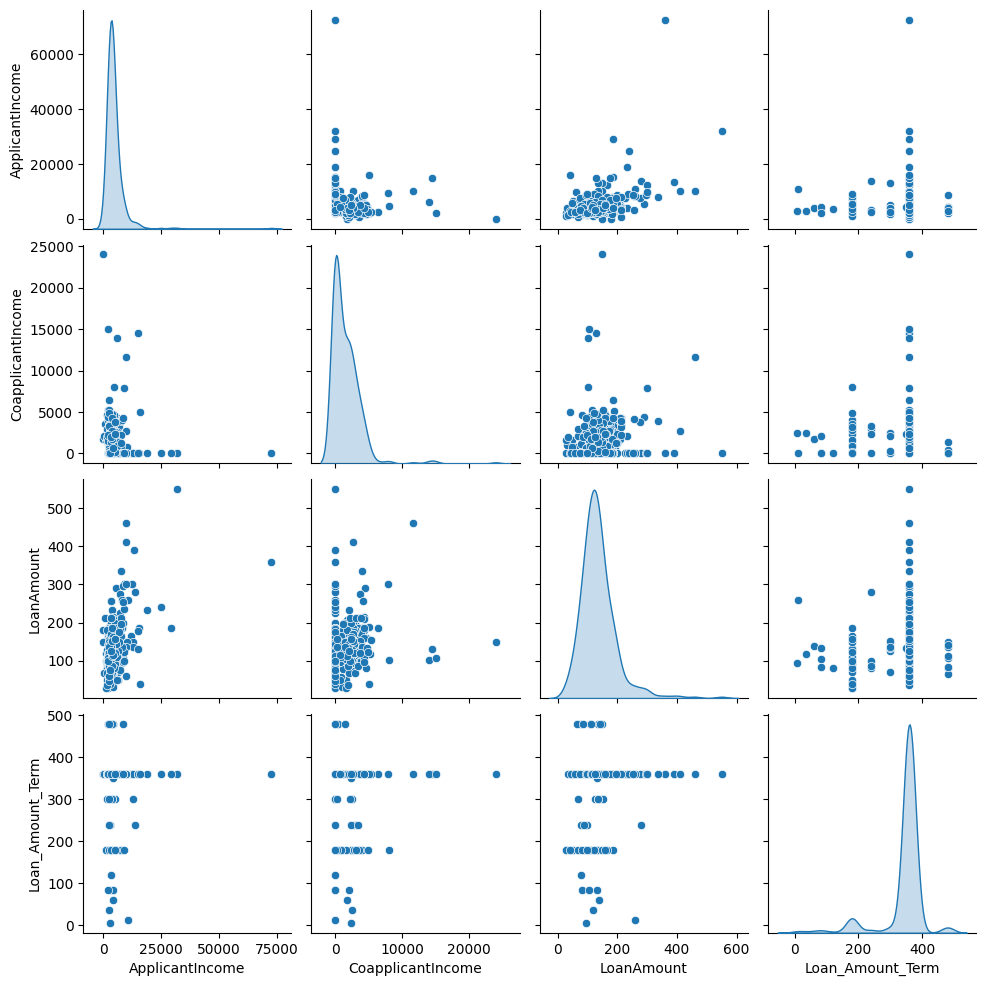

In [ ]:
# Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.

sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], diag_kind='kde')
plt.show()

<ipython-input-26-97bf4932f8a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education',y='LoanAmount',data=df,palette="muted")


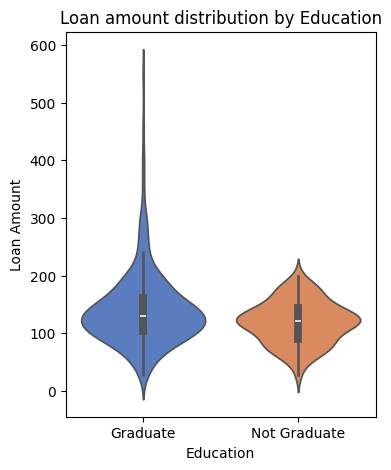

In [ ]:
# Investigate the relationship between categorical and numeric variables using box plots or violin plots.

plt.figure(figsize=(4,5))
sns.violinplot(x='Education',y='LoanAmount',data=df,palette="muted")
plt.title('Loan amount distribution by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

 2.3 Multivariate Analysis


In [ ]:
#  Perform a correlation analysis to identify relationships between numeric variables.

correlation= df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.110335,0.490170,0.023319,0.094944
CoapplicantIncome,-0.110335,1.000000,0.150112,-0.008633,-0.058004
LoanAmount,0.490170,0.150112,1.000000,0.093472,-0.013200
Loan_Amount_Term,0.023319,-0.008633,0.093472,1.000000,-0.048189
Credit_History,0.094944,-0.058004,-0.013200,-0.048189,1.000000


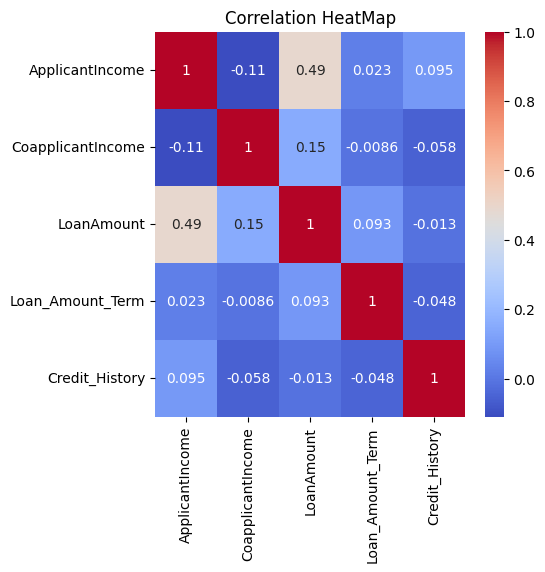

In [ ]:
# Visualize correlations using a heatmap.

plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

In [ ]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

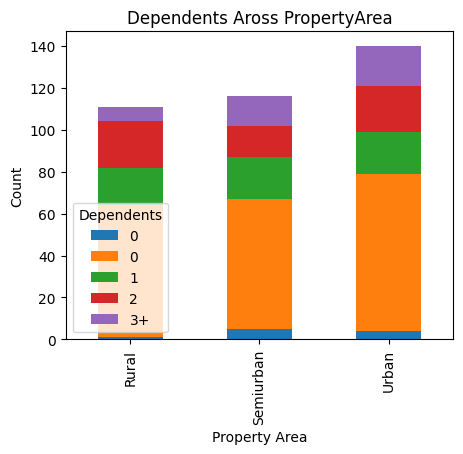

In [ ]:
# Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

property_edu= df.groupby(['Property_Area','Dependents']).size().unstack()

property_edu.plot(kind='bar', stacked=True, figsize=(5,4))
plt.title('Dependents Aross PropertyArea')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Dependents')
plt.show()